In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
plt.rc("font", size=14)
import seaborn as sns

/home/nardos/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import os

In [3]:
pwd

'/home/nardos/Documents/AI saturdays'

In [4]:
data_dir = '/home/nardos/Documents/AI saturdays/'
data = pd.read_csv(data_dir + 'banking.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [6]:
len(data.columns)

21

In [7]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

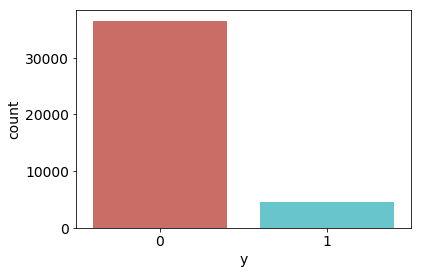

In [8]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

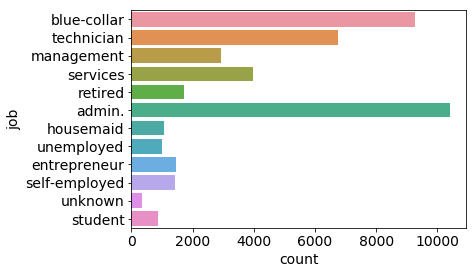

In [9]:
sns.countplot(y="job", data=data)
plt.show()

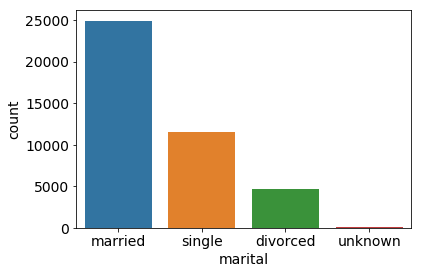

In [10]:
sns.countplot(x="marital", data=data)
plt.show()

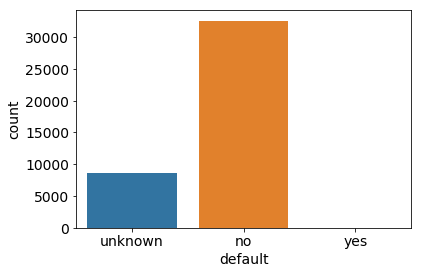

In [11]:
sns.countplot(x="default", data=data)
plt.show()

In [12]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [13]:
data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

In [14]:
data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [15]:
data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

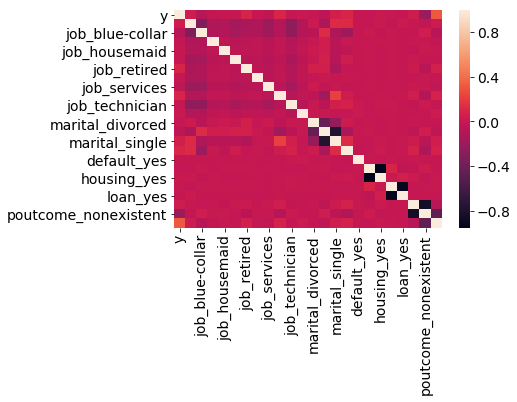

In [16]:
sns.heatmap(data2.corr())
plt.show()

In [17]:
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
X_train.shape

(30891, 23)

In [19]:
X_test.shape

(10297, 23)

In [22]:
y_test = y_test.reshape(y_test.shape[0],1)
y_test.shape


(10297, 1)

In [23]:
y_train = y_train.reshape(y_train.shape[0],1)
y_train.shape

(30891, 1)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

- You calculate the cost function by summing over all training examples:
$$ cost = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$
$cost = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})\tag{4}$


- Here is the gradient parameters expression

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{5}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{6}$$

In [143]:
class LR(object):
    ''' 
    A Logistic regression 
    Arguments:
    input_dim -- number of input dimension 
    num_iterations -- number of iterations for training
    learning_rate -- optimization learning rate parameter 
    '''
    
    def __init__(self, input_dim, num_iterations, learning_rate):
        
        super(LR, self).__init__()
        
        self.input_dim = input_dim
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        
        self.W = None
        self.b = None 
        
        # initialize_with_zeros
        
        self.dw = None
        self.db = None
        self.cost = None
        self.m = None
        
    def initialize_with_zeros(self, dim):
        ''' 
        returns a numpy ndarray of W(dim, 1) and b(0) 
        and assign it to self.W and self.b 
        '''
        
        self.W = np.random.randn(dim,1)*0.01
        self.b = np.zeros((1,self.m))
        
    
    def forward_prop(self, X, activation="sigmoid"):
        ''' returns sigmoid( (W.T x X) + b ) '''
        
#         print('W:',self.W.shape,'X: ', X.shape)
        Z = np.dot(self.W.T,X) + self.b
        if activation == "sigmoid":
            A = self.sigmoid(Z)
       
        return A
    
    
    def back_prop(self, A, X, Y):
        ''' 
        calculate and assign the parameters dw and db
        '''
#         print('X in back:',X.shape)
        amy = A - Y
#         print("amy", amy.shape)
        self.dw = np.dot(X,(amy.T))/self.m
        self.db = np.sum(amy, axis=1, keepdims=True)/self.m
        
        
    def cost_fun(self, A, Y):
        ''' 
        returns the loss between A and Y 
        '''
#         print('Y cost:',Y.shape, 'A cost:', A.shape)
        self.cost = -np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))/self.m 
        
    
    def optimize(self):
        ''' 
        update the W and b parameters using dw and db
        '''
        self.W -= self.learning_rate*self.dw
        self.b -= self.learning_rate*self.db
                         
            
    def predict(self, A):
        '''
        return the prediction of an input X using W and b
        '''
        prediction = (A > 0.5)
    
        return prediction
        
    
    def sigmoid(self, z):
        ''' 
        returns the sigmoid of z 
        '''
        sigmoid = 1/(1+np.exp(-z))
        return sigmoid
    
    def train(self, X, Y, print_cost):
        '''
        initialize
        
        iterate:
            forward_prop
            cost (optional)
            back_prop
            optimize
        '''
        self.costt=[]
        self.m = X.shape[1]
        self.initialize_with_zeros(self.input_dim)
        accuracy = 0.
        for i in range(self.num_iterations):
            A = self.forward_prop(X)
            self.cost_fun(A, Y)
#             print('cost:self.cost')
            
            self.back_prop(A, X, Y)
            self.optimize()
            pred = self.predict(A)
            if (i%100==0) and (print_cost == True):
                print('cost after itertion ',i,':',self.cost)
              
                accuracy = np.sum(pred == Y)/self.m
            self.costt.append(self.cost)
                
        print('Train accuracy:',accuracy*100)


In [195]:
lr = LR(input_dim=X_train.T.shape[0], num_iterations=1000, learning_rate=5.25)

In [196]:
lr.train(X_train.T, y_train.T, print_cost=True)

cost after itertion  0 : 0.694797441458
cost after itertion  100 : 0.314656444811
cost after itertion  200 : 0.314398289486
cost after itertion  300 : 0.314372940917
cost after itertion  400 : 0.314367156224
cost after itertion  500 : 0.314365595357
cost after itertion  600 : 0.314365113186
cost after itertion  700 : 0.314364921534
cost after itertion  800 : 0.314364812295
cost after itertion  900 : 0.314364729177
Train accuracy: 89.6539445146


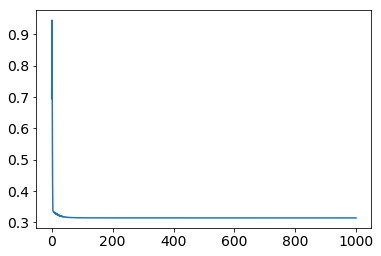

In [197]:
plt.plot(range(lr.num_iterations), lr.costt)
plt.show()

cost after itertion  0 : 0.692782245725
cost after itertion  100 : 0.314658041793
cost after itertion  200 : 0.314398232023
cost after itertion  300 : 0.314372934516
cost after itertion  400 : 0.314367171307
cost after itertion  500 : 0.314365615204
cost after itertion  600 : 0.314365133295
cost after itertion  700 : 0.31436494078
cost after itertion  800 : 0.314364830438
cost after itertion  900 : 0.314364746213
Train accuracy: 89.6539445146


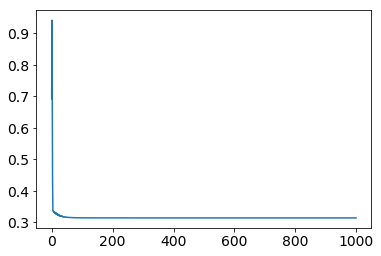

cost after itertion  0 : 0.691474069685
cost after itertion  100 : 0.314659622455
cost after itertion  200 : 0.314399147101
cost after itertion  300 : 0.31437345302
cost after itertion  400 : 0.314367548101
cost after itertion  500 : 0.314365935533
cost after itertion  600 : 0.314365421941
cost after itertion  700 : 0.31436520559
cost after itertion  800 : 0.314365074601
cost after itertion  900 : 0.314364971584
Train accuracy: 89.6539445146


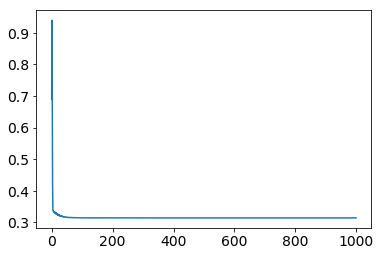

cost after itertion  0 : 0.682742954643
cost after itertion  100 : 0.314657645975
cost after itertion  200 : 0.314399613863
cost after itertion  300 : 0.314373247491
cost after itertion  400 : 0.314367170204
cost after itertion  500 : 0.314365535189
cost after itertion  600 : 0.314365037026
cost after itertion  700 : 0.314364844723
cost after itertion  800 : 0.314364738731
cost after itertion  900 : 0.314364659682
Train accuracy: 89.6539445146


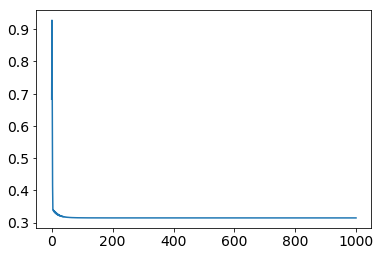

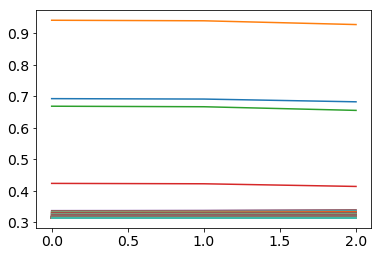

In [199]:
epoch_cost=[]
for i in range(3):
    lr = LR(input_dim=X_train.T.shape[0], num_iterations=1000, learning_rate=5.25)
    lr.train(X_train.T, y_train.T, print_cost=True)
    plt.plot(range(lr.num_iterations), lr.costt)
    plt.show()
    epoch_cost.append(lr.costt)
plt.plot(range(3), epoch_cost)
plt.show()    